In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy, matplotlib.pyplot as plt
from pathlib import Path
import mir_utils as miru
import feature_functions as ff
import scipy
import madmom
import time
import os
import librosa, librosa.display

##### because i make a lot of changes to ff & miru
import imp
def loadLibs():    
    imp.reload(ff)
    imp.reload(miru)
#####

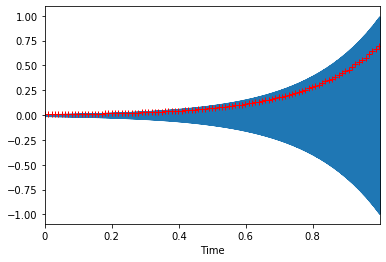

In [142]:
### extracting shape of audio with a few points
T = 1.0      # duration in seconds
sr = 22050   # sampling rate in Hertz
t = np.linspace(0, T, int(T*sr), endpoint=False)
amplitude = np.logspace(-2, 0, int(T*sr), endpoint=False) # time-varying amplitude
x = amplitude*np.sin(2*np.pi*440*t)

fl=int(len(x)/100)
hl=fl
rmse = librosa.feature.rms(x, frame_length=fl, hop_length=hl, center=True)

librosa.display.waveplot(x, sr=sr)

frames = range(rmse.shape[1])
ft = librosa.frames_to_time(frames, sr=sr, hop_length=hl)

plt.plot(ft,rmse[0],"+",color="red")


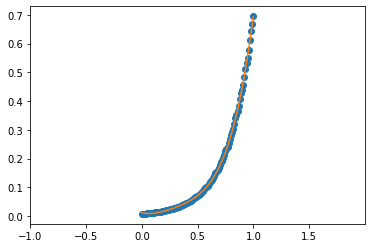

array([ 1.66578573, -1.79378082,  0.91377107, -0.09739501,  0.01140086])

In [148]:
# calculate polynomial. The coefficient polynomial might make a good feature that represents adsr
x=ft
y=rmse[0]
z = np.polyfit(x, y, 4)
f = np.poly1d(z)


# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()
